### Plots for Casc 

21/08/2022


#### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import os
import sys

In [5]:
import pandas as pd
sys.path.append('/home/ademin/reduce3/reduce-algebra-code/generic/rbench')

In [6]:
import rbench as rb

### Loading data

In [151]:
f5 = rb.read_filetree('./f5-full', 'f5').select('boot').deselect(['heapsize', 'valid'])
groebner = rb.read_filetree('./groebner-full', 'groebner').select('boot').deselect(['heapsize', 'valid'])

In [152]:
combo = groebner.join(f5, how='inner')

In [156]:
combo.slow(0.1)[[('f5', 'cpu_boot'), ('groebner', 'cpu_boot')]]

,f5,groebner
,cpu_boot,cpu_boot
biomodels/BIOMD0000000002,0.17,1.24
biomodels/BIOMD0000000028,0.09,0.10
biomodels/BIOMD0000000030,0.12,0.14
biomodels/BIOMD0000000038,4.45,0.45
biomodels/BIOMD0000000046,0.27,1.13
biomodels/BIOMD0000000085,NaN,NaN
biomodels/BIOMD0000000086,NaN,NaN
biomodels/BIOMD0000000102,NaN,5.66
biomodels/BIOMD0000000103,NaN,NaN


In [41]:
combo005 = combo.slow(0.05)

### Plots

In [54]:
x = combo005[('groebner', 'cpu_boot')]
y = combo005[('f5', 'cpu_boot')]

In [79]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

<ipython-input-79-05fc9baf44d5>:3: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [104]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

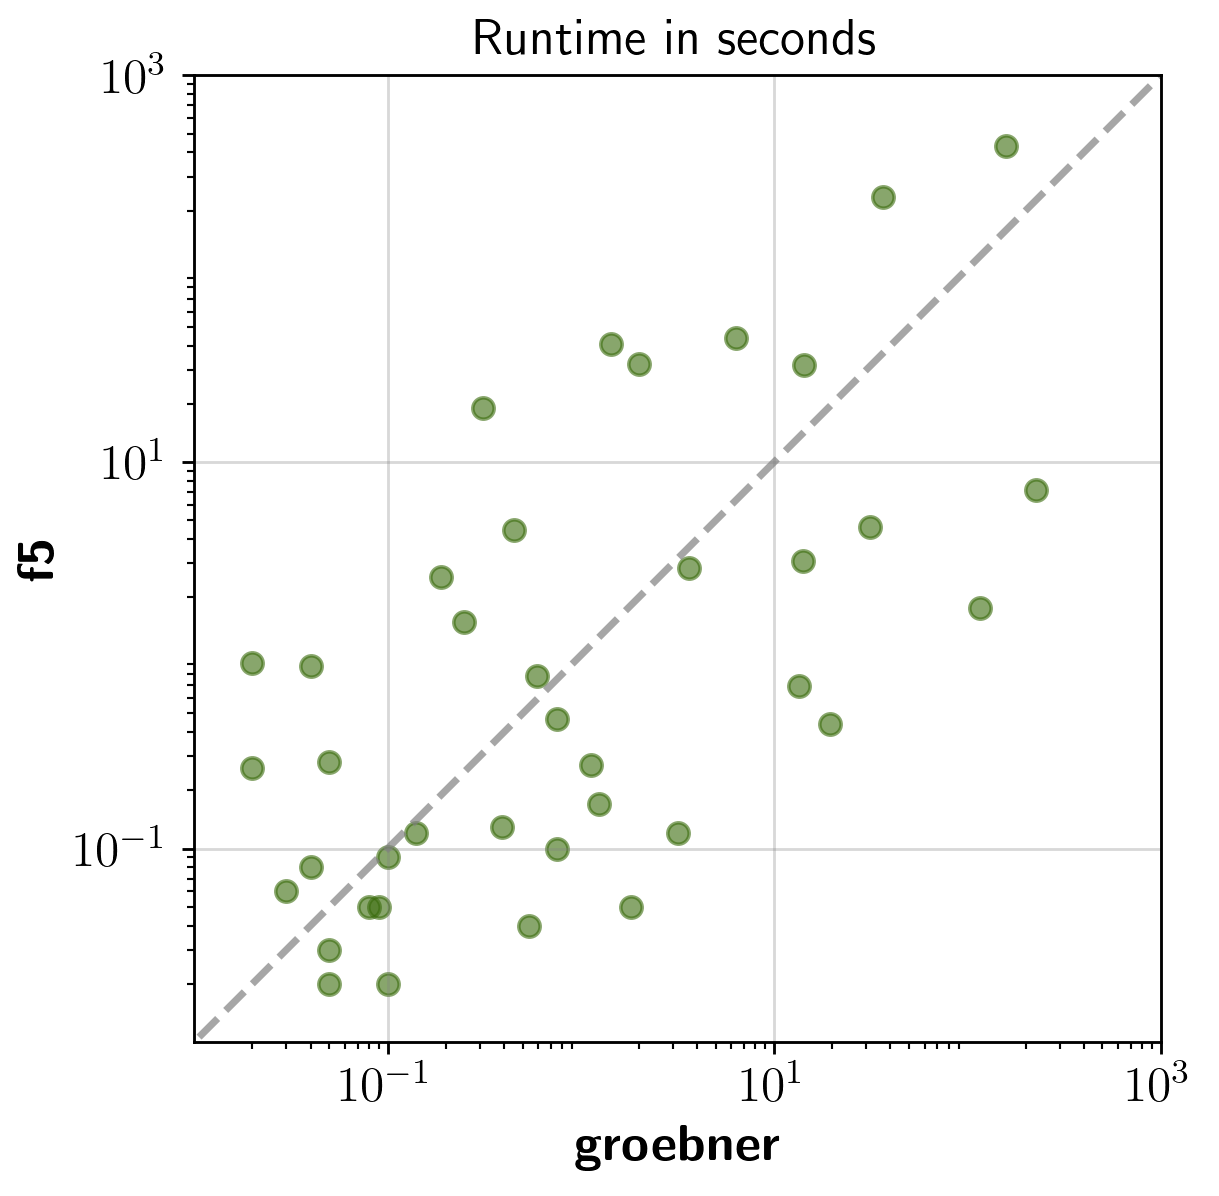

In [169]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=256)

scatter = ax.scatter(x, y, c='#396b0b', alpha=0.6)

ax.set_title(r"\Large Runtime in seconds")
ax.set_xlabel(r'{\Large \textbf{groebner}}')
ax.set_ylabel(r'\Large \textbf{f5}')

ax.plot([0, 1000], [0, 1000], c='gray', linestyle='--', lw=2, alpha=0.7)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_aspect('equal')
plt.xlim(xmin=0.01,xmax=1000)
# only show 100 - 1600 on y-axis.
plt.ylim(ymin=0.01,ymax=1000)

plt.xticks([0.1, 10,  1000])
plt.yticks([0.1, 10,  1000])

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

plt.grid(True, alpha=0.3, c='gray')

# legend1 = ax.legend(*scatter.legend_elements(),
#                    loc="upper right")
# ax.add_artist(legend1)

plt.show()

In [138]:
fig.savefig("uwu.png")

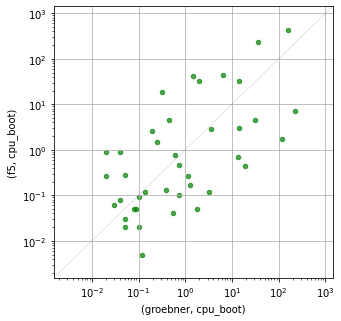

In [43]:
x = combo005.plot.scatter(
    x=('groebner', 'cpu_boot'), 
    y=('f5', 'cpu_boot'), 
    color='g', 
    alpha=0.7
)

In [13]:
f = x.get_figure()
f.savefig("wuwu.png")